In [17]:
pip install matplotlib


     ---------------------------------------- 0.0/165.5 kB ? eta -:--:--
     ------------------- ------------------- 81.9/165.5 kB 2.3 MB/s eta 0:00:01
     -------------------------------------- 165.5/165.5 kB 3.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.0 MB 32.0 MB/s eta 0:00:01
   --------------- ------------------------ 3.1/8.0 MB 39.4 MB/s eta 0:00:01
   ----------------------- ---------------- 4.6/8.0 MB 36.6 MB/s eta 0:00:01
   ------------------------------- -------- 6.3/8.0 MB 40.4 MB/s eta 0:00:01
   ------------------------------------ --- 7.2/8.0 MB 32.8 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 31.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/189.9 kB ? eta -:--:--
   ---------------------------------------- 189.9/189.9 kB ? eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ------------------ 

In [19]:
#bibliotecas
import pandas as pd
import numpy as np


In [64]:
import matplotlib.pyplot as plt

In [29]:
df_titanic = pd.read_csv("titanic.csv")
df_titanic
#lendo arquivos

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [30]:
df_titanic.shape
#ajuda a identificar a quantidade da dados que estamos puxando

(891, 12)

In [65]:
df_backup = df_titanic.copy

In [32]:
df_titanic.columns
#Mostra as colunas do documento

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [33]:
df_titanic.dtypes
#Traz o tipo de dado em cada atributo

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [34]:
df_titanic.info()
#Traz o quantitativo de valores nulos em cada coluna

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [35]:
df_titanic.describe()
#Descreve as informações

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [57]:
def processamento_df(df_titanic):
    df_titanic.head(3)
    #traz as 3 primeiras linhas do dataset

    baby_df = df_titanic.sample(100)
    #pega as infos do dataset de 100 linhas (amostragem)

    df_titanic = df_titanic.sort_values("Fare")
    #ordenar valores de uma coluna

    df_titanic = df_titanic.drop(["SibSp", "Parch"], axis = "columns")
    #deleta linhas e colunas

    df_titanic = df_titanic.dropna(subset = "Fare")
    #apaga os valores nulos e vazios

    df_titanic = df_titanic.reset_index()
    #colocar em ordem

    metricas = df_titanic.describe()
    #descreve como está

    return baby_df, df_titanic, metricas


In [58]:
#Leitura do csv
df_titanic = pd.read_csv("titanic.csv")

In [59]:
baby_df, df_titanic, metricas = processamento_df(df_titanic)

In [63]:
print("Amostra aleatoria (baby_df):")
print(baby_df)

Amostra aleatoria (baby_df):
     PassengerId  Survived  Pclass  \
505          506         0       1   
477          478         0       3   
752          753         0       3   
301          302         1       3   
671          672         0       1   
..           ...       ...     ...   
184          185         1       3   
529          530         0       2   
413          414         0       2   
183          184         1       2   
8              9         1       3   

                                                  Name     Sex   Age  SibSp  \
505         Penasco y Castellana, Mr. Victor de Satode    male  18.0      1   
477                          Braund, Mr. Lewis Richard    male  29.0      1   
752                   Vande Velde, Mr. Johannes Joseph    male  33.0      0   
301                                 McCoy, Mr. Bernard    male   NaN      2   
671                             Davidson, Mr. Thornton    male  31.0      1   
..                                      

In [62]:
print("Dataframe processado (df_titanic):")
print(df_titanic)

Dataframe processado (df_titanic):
     index  PassengerId  Survived  Pclass                                Name  \
0      271          272         1       3        Tornquist, Mr. William Henry   
1      597          598         0       3                 Johnson, Mr. Alfred   
2      302          303         0       3     Johnson, Mr. William Cahoone Jr   
3      633          634         0       1       Parr, Mr. William Henry Marsh   
4      277          278         0       2         Parkes, Mr. Francis "Frank"   
..     ...          ...       ...     ...                                 ...   
886    438          439         0       1                   Fortune, Mr. Mark   
887    341          342         1       1      Fortune, Miss. Alice Elizabeth   
888    737          738         1       1              Lesurer, Mr. Gustave J   
889    258          259         1       1                    Ward, Miss. Anna   
890    679          680         1       1  Cardeza, Mr. Thomas Drake Marti

In [ ]:
print("Metricas descritivas (metricas):")
print(metricas)

Text(0.5, 1.0, 'Numero de passageiros por classe')

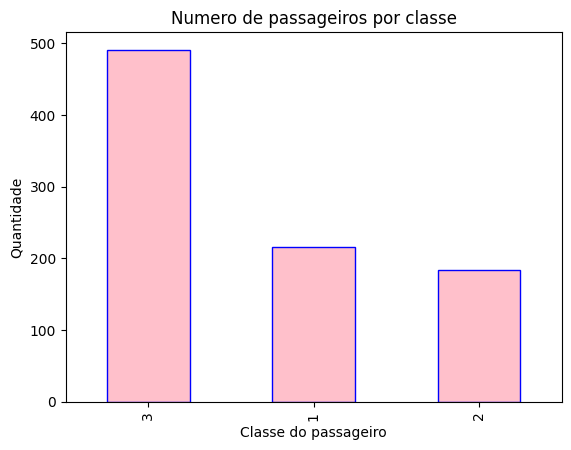

In [69]:
contagem_passageiros = df_titanic["Pclass"].value_counts()
contagem_passageiros.plot(kind= "bar", edgecolor = "blue", color = "pink")

plt.xlabel("Classe do passageiro")
plt.ylabel("Quantidade")
plt.title("Numero de passageiros por classe")

In [ ]:
#1 - Taxa de Sobrevivência por Sexo
#2 - Distribuição de Idade

In [78]:
taxa_de_sobrevivência_por_sexo = df_titanic["Sex"].groupby[df_titanic('Survived')].value_counts()
taxa_de_sobrevivência_por_sexo.plot(kind= "bar", edgecolor = "orange", color = "yellow")

plt.xlabel("Sexo")
plt.ylabel("Sexo")
plt.title("Numero de sobreviventes por sexo")

TypeError: 'DataFrame' object is not callable